In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# Visualizing 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# import torch

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('./runs')

from utils import Pipeline_lstm

2023-01-13 19:48:19.055237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Id,date,coin_id,fwd_ret_3d,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
0,0,0,2021-01-01,coin_1,-0.447641,-0.696429,0.264151,0.410714,0.796296,-0.803571,0.089286,NaN,NaN,NaN,NaN
1,1,1,2021-01-01,coin_2,-1.051790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2021-01-01,coin_3,-2.125939,0.482143,0.641509,0.089286,-0.648148,0.732143,0.732143,NaN,NaN,NaN,NaN
3,3,3,2021-01-01,coin_4,2.403588,0.625000,0.339623,-0.232143,-0.907407,0.303571,0.553571,NaN,NaN,NaN,NaN
4,4,4,2021-01-01,coin_5,0.872055,-0.375000,0.867925,-0.696429,0.203704,-0.517857,-0.589286,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 0', 'Id', 'feat_7'], axis = 1)
df["date"] = pd.to_datetime(df["date"])

df = df.set_index('date')

df.head()

,coin_id,fwd_ret_3d,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_8,feat_9,feat_10
date,,,,,,,,,,,
2021-01-01,coin_1,-0.447641,-0.696429,0.264151,0.410714,0.796296,-0.803571,0.089286,NaN,NaN,NaN
2021-01-01,coin_2,-1.051790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,coin_3,-2.125939,0.482143,0.641509,0.089286,-0.648148,0.732143,0.732143,NaN,NaN,NaN
2021-01-01,coin_4,2.403588,0.625000,0.339623,-0.232143,-0.907407,0.303571,0.553571,NaN,NaN,NaN
2021-01-01,coin_5,0.872055,-0.375000,0.867925,-0.696429,0.203704,-0.517857,-0.589286,NaN,NaN,NaN


In [4]:
df.shape

(36725, 11)

In [5]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(df)
# report.to_file('final_profile_report.html')

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


df_coin_1 = df[df['coin_id'] == 'coin_1']
df_coin_1 = df_coin_1.drop('coin_id', axis=1)
df_coin_1.shape

(565, 10)

In [7]:
X = df_coin_1.drop(['fwd_ret_3d'], axis=1)
y = df_coin_1['fwd_ret_3d']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy="mean").fit(X, y)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score


In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
print('LinearRegression:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy (R2) of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))

LinearRegression:
Mean Absolute Error: 1.2837242146718821
Mean Squared Error: 3.527136101658248
Root Mean Squared Error: 1.878067118517932
Accuracy (R2) of our model is 11.0%


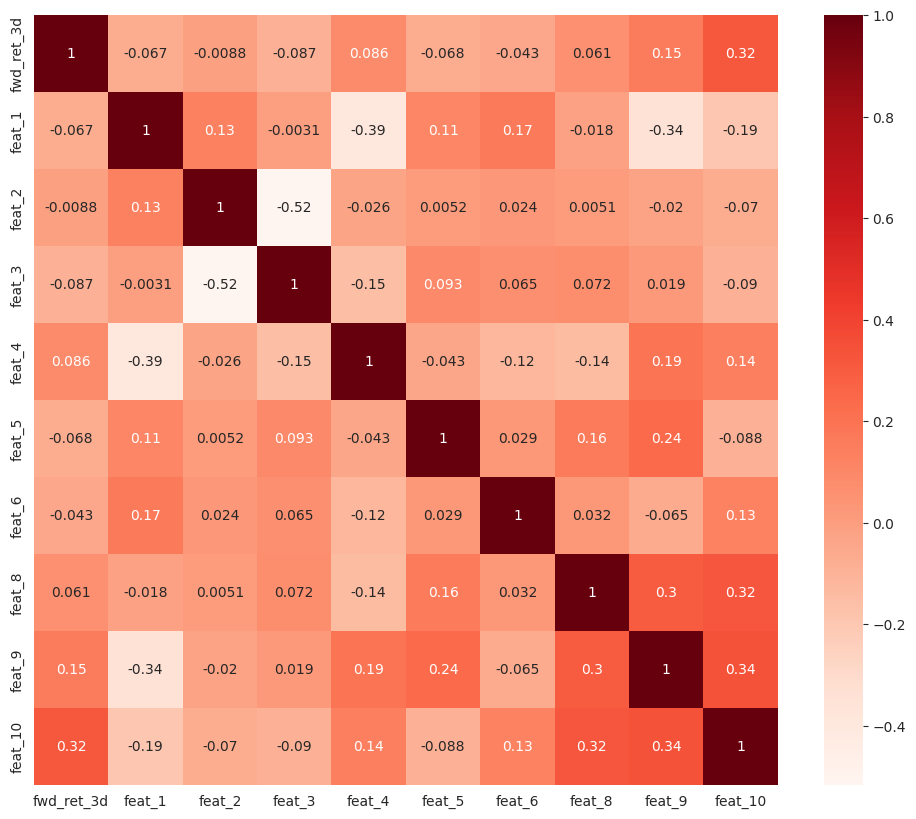

In [12]:
plt.figure(figsize=(12,10))
cor = df_coin_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
cor_target = abs(cor["fwd_ret_3d"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

fwd_ret_3d    1.000000
feat_9        0.152662
feat_10       0.316289
Name: fwd_ret_3d, dtype: float64

In [14]:
relevant_features = cor_target[abs(cor_target)>0.1]
relevant_features

fwd_ret_3d    1.000000
feat_9        0.152662
feat_10       0.316289
Name: fwd_ret_3d, dtype: float64

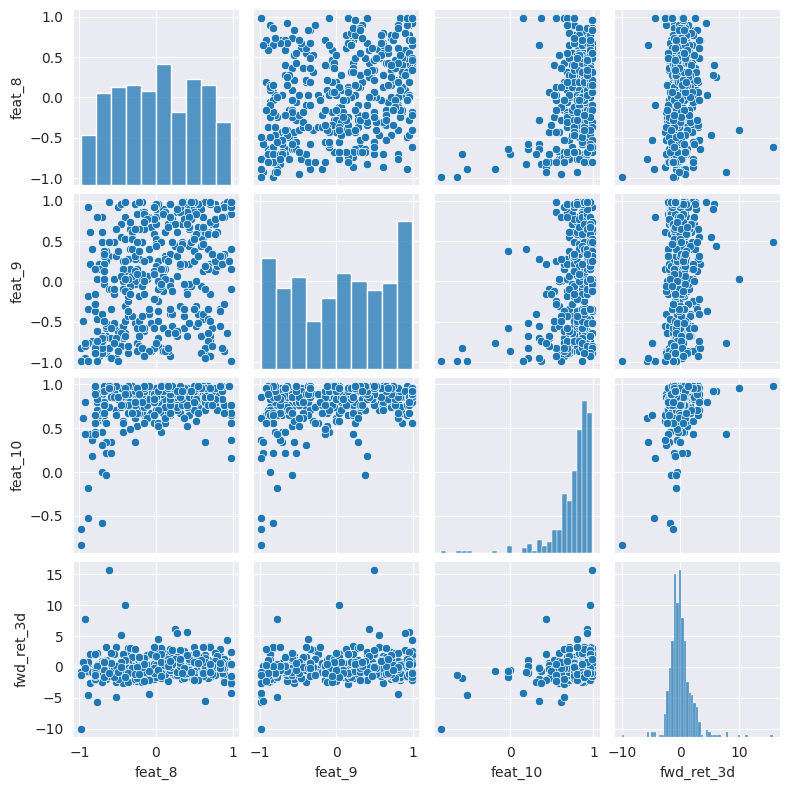

In [15]:
sns.pairplot(df_coin_1[['feat_8', 'feat_9', 'feat_10', 'fwd_ret_3d']], height=2.0)


In [16]:
# sns.pairplot(df[['feat_10', 'fwd_ret_3d']], height=2.0)

In [17]:
df_coin_1 = df_coin_1[['feat_9', 'feat_10', 'fwd_ret_3d']]
X = df_coin_1.drop(['fwd_ret_3d'], axis=1)
y = df_coin_1['fwd_ret_3d']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy="mean").fit(X, y)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

poly_degree2 = 1
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


polyreg_scaled=make_pipeline(PolynomialFeatures(poly_degree2),scaler,LinearRegression())
polyreg_scaled.fit(x_train,y_train)

regressor = Ridge()
regressor.fit(x_train, y_train)

Ridge()

In [19]:
y_pred = polyreg_scaled.predict(x_test)

In [20]:
print('LinearRegression:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy (R2) of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))

LinearRegression:
Mean Absolute Error: 1.272066992683768
Mean Squared Error: 3.452705489617824
Root Mean Squared Error: 1.858145712697964
Accuracy (R2) of our model is 13.0%


In [21]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
y_pred = regr.predict(x_test)

regr.score(x_test, y_test)

0.1338010249151077

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy (R2) of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))

Mean Absolute Error: 1.2660484568094752
Mean Squared Error: 3.419407310770893
Root Mean Squared Error: 1.8491639491323892
Accuracy (R2) of our model is 13.0%


In [23]:
df_coin_1.shape
df_coin_1.head()

,feat_9,feat_10,fwd_ret_3d
date,,,
2021-01-01,NaN,NaN,-0.447641
2021-01-02,NaN,NaN,0.049248
2021-01-03,NaN,NaN,0.868574
2021-01-04,NaN,NaN,1.769486
2021-01-05,NaN,NaN,2.434087


In [24]:
import torch

X = df_coin_1.drop(['fwd_ret_3d'], axis=1)
y = df_coin_1['fwd_ret_3d']

print(y)
imputer = SimpleImputer(strategy="mean").fit(X, y)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)

X['fwd_ret_3d'] = y.values
df_coin_1 = X

print()
print("PyTorch Version : {}".format(torch.__version__))

date
2021-01-01   -0.447641
2021-01-02    0.049248
2021-01-03    0.868574
2021-01-04    1.769486
2021-01-05    2.434087
                ...   
2022-07-15   -1.020909
2022-07-16   -1.160422
2022-07-17   -1.596880
2022-07-18   -0.855355
2022-07-19   -0.926825
Name: fwd_ret_3d, Length: 565, dtype: float64

PyTorch Version : 1.13.0


In [25]:
df_coin_1.head()

,feat_9,feat_10,fwd_ret_3d
0,0.046404,0.776068,-0.447641
1,0.046404,0.776068,0.049248
2,0.046404,0.776068,0.868574
3,0.046404,0.776068,1.769486
4,0.046404,0.776068,2.434087


In [26]:
df_coin_1.columns

Index(['feat_9', 'feat_10', 'fwd_ret_3d'], dtype='object')

In [27]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

feature_cols = ['feat_9', 'feat_10']
target_col = 'fwd_ret_3d'
lookback = 3

X = df_coin_1[feature_cols]
Y = df_coin_1[target_col]

train_size = int(X.shape[0] * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

pipe = Pipeline_lstm()
train_ds = pipe.fit_transform(X_train, y_train, lookback=lookback)
test_ds = pipe.transform(X_test, y_test, lookback=lookback)

train_loader = DataLoader(train_ds, shuffle=False, batch_size=32)
test_loader  = DataLoader(test_ds,  shuffle=False, batch_size=32)

In [28]:
# # import numpy as np
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
#
# feature_cols = ['feat_9', 'feat_10']
# target_col = 'fwd_ret_3d'
#
# X = df_coin_1[feature_cols].values
# Y = df_coin_1[target_col].values
#
# n_features = X.shape[1]
# lookback = 3
#
# X_organized, Y_organized = [], []
# for i in range(0, X.shape[0]-lookback, 1):
#     X_organized.append(X[i:i+lookback])
#     Y_organized.append(Y[i+lookback])
#
# X_organized, Y_organized = np.array(X_organized), np.array(Y_organized)
# X_organized, Y_organized = torch.tensor(X_organized, dtype=torch.float32), torch.tensor(Y_organized, dtype=torch.float32)
#
# train_size = int(X_organized.shape[0] * 0.8)
# X_train, Y_train, X_test, Y_test = X_organized[:train_size], Y_organized[:train_size], X_organized[train_size:], Y_organized[train_size:]
#
# X_organized.shape, Y_organized.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [29]:
# # Нам не надо по идеи усреднять y_train ведь на тесте мы так не сможем
# mean, std = Y_train.mean(), Y_train.std()
#
# print("Mean : {:.2f}, Standard Deviation : {:.2f}".format(mean, std))
# Y_train_scaled, Y_test_scaled = (Y_train - mean)/std , (Y_test-mean)/std
#
# X_train.shape, Y_train_scaled.shape, X_test.shape,  Y_test_scaled.shape

In [30]:
# # import gc
#
# del X, Y
#
# gc.collect()

In [31]:
# # from torch.utils.data import TensorDataset, DataLoader
#
# train_dataset = TensorDataset(X_train, Y_train)
# test_dataset  = TensorDataset(X_test,  Y_test)
#
# train_loader = DataLoader(train_dataset, shuffle=False, batch_size=32)
# test_loader  = DataLoader(test_dataset,  shuffle=False, batch_size=32)

In [32]:
from torch import nn
from torch.nn import functional as F

hidden_dim = 32
n_layers=2
n_features = len(feature_cols)

class LSTMRegressor(nn.Module):
    def __init__(self, input_size=2, hidden_dim=32, n_layers=2, device='cpu'):
        self.input_size = input_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.device = device
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_dim, num_layers=self.n_layers, batch_first=True)
        self.linear = nn.Linear(self.hidden_dim, 1)

    def forward(self, X_batch):
        hidden, carry = torch.randn(self.n_layers, len(X_batch), self.hidden_dim, device=self.device), torch.randn(self.n_layers, len(X_batch), self.hidden_dim, device=self.device)
        output, (hidden, carry) = self.lstm(X_batch, (hidden, carry))
        return self.linear(output[:,-1])

In [33]:
lstm_regressor = LSTMRegressor(n_features, hidden_dim, n_layers, device=DEVICE).to(device=DEVICE)

lstm_regressor

LSTMRegressor(
  (lstm): LSTM(2, 32, num_layers=2, batch_first=True)
  (linear): Linear(in_features=32, out_features=1, bias=True)
)

In [34]:
for layer in lstm_regressor.children():
    print("Layer : {}".format(layer))
    print("Parameters : ")
    for param in layer.parameters():
        print(param.shape)
    print()

Layer : LSTM(2, 32, num_layers=2, batch_first=True)
Parameters : 
torch.Size([128, 2])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])

Layer : Linear(in_features=32, out_features=1, bias=True)
Parameters : 
torch.Size([1, 32])
torch.Size([1])



In [35]:
out = lstm_regressor(torch.randn(100, lookback, n_features, device=DEVICE))

out.shape

torch.Size([100, 1])

In [36]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import gc

def CalcValLoss(model, loss_fn, val_loader, device='cpu', return_preds=False):
    with torch.no_grad():
        losses = []
        preds_all = torch.tensor([], dtype=torch.float32, device='cpu')
        for X, Y in val_loader:
            preds = model(X.to(device=device)).to(device='cpu')
            loss = loss_fn(preds.ravel(), Y)
            losses.append(loss.item())
            if (return_preds):
                preds_all = torch.concat([preds_all, preds], dim=0)
        avg_loss = torch.tensor(losses).mean()
        if (return_preds):
            return avg_loss, preds_all
        return avg_loss

def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10, display_on_epoch = 100, device='cpu'):
    for i in tqdm(range(1, epochs+1)):
        losses = []
        for X, Y in train_loader:
            Y_preds = model(X.to(device=device)).to(device='cpu')

            loss = loss_fn(Y_preds.ravel(), Y).to(device='cpu')
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        avg_train_loss = torch.tensor(losses).mean()
        avg_val_loss = CalcValLoss(model, loss_fn, val_loader, device=device)
        writer.add_scalar("train/loss", avg_train_loss, i)
        writer.add_scalar("val/loss", avg_val_loss, i)
        if i % display_on_epoch == 0:
            print("Epoch : {}".format(i))
            print("Train Loss : {:.3f}".format(avg_train_loss))
            print("Valid Loss : {:.3f}".format(avg_val_loss))
    return losses

In [ ]:
from torch.optim import Adam, SGD

epochs = 5000
learning_rate = 1e-4

loss_fn = nn.MSELoss()
lstm_regressor = LSTMRegressor(n_features, hidden_dim, n_layers, device=DEVICE).to(device=DEVICE)
# optimizer = Adam(lstm_regressor.parameters(), lr=learning_rate)
optimizer = Adam(lstm_regressor.parameters(), lr=learning_rate)

_ = TrainModel(lstm_regressor, loss_fn, optimizer, train_loader, test_loader, epochs, device=DEVICE, display_on_epoch=500)

 10%|█         | 507/5000 [00:10<01:33, 47.80it/s]

Epoch : 500
Train Loss : 2.759
Valid Loss : 5.897


 20%|██        | 1004/5000 [00:20<01:23, 47.78it/s]

Epoch : 1000
Train Loss : 2.762
Valid Loss : 5.689


 30%|███       | 1504/5000 [00:30<01:12, 48.28it/s]

Epoch : 1500
Train Loss : 2.706
Valid Loss : 5.605


 40%|████      | 2005/5000 [00:41<01:02, 47.98it/s]

Epoch : 2000
Train Loss : 2.723
Valid Loss : 5.379


 44%|████▎     | 2184/5000 [00:45<00:55, 50.52it/s]

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

loss, test_preds = CalcValLoss(lstm_regressor, nn.MSELoss(), test_loader, device=DEVICE, return_preds=True)

print("Test  MSE : {:.2f}".format(loss))
print("Test  R^2 Score : {:.2f}".format(r2_score(
        test_ds.tensors[1].detach().numpy(),
        test_preds.detach().cpu().numpy().squeeze())
    )
)